In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("/content/Book1.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

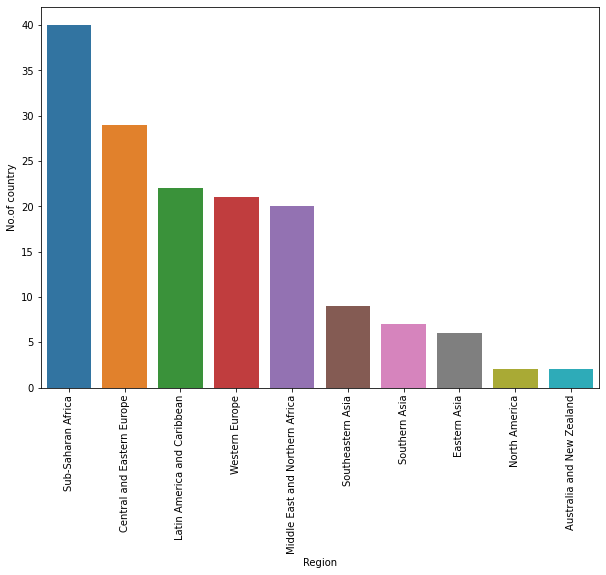

In [6]:
df1=df.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=df1.index,y=df1.values)
plt.xlabel("Region")
plt.xticks(rotation=90)
plt.ylabel('No.of country')
plt.show()

In [7]:
df.rename({'Happiness Score': 'Happiness_Score'}, axis=1, inplace=True)
df

,Country,Region,Happiness Rank,Happiness_Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [9]:
x=df.drop('Happiness_Score',axis=1)
y=df.Happiness_Score

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(126, 11) (32, 11)
(126,) (32,)


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(40,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corrospoding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score to ",final_r_state,"is",max_r_score)
    return final_r_state

In [14]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corrospoding to  40 is 1.0
r2 score corrospoding to  41 is 1.0
r2 score corrospoding to  42 is 1.0
r2 score corrospoding to  43 is 1.0
r2 score corrospoding to  44 is 1.0
r2 score corrospoding to  45 is 1.0
r2 score corrospoding to  46 is 1.0
r2 score corrospoding to  47 is 1.0
r2 score corrospoding to  48 is 1.0
r2 score corrospoding to  49 is 1.0
r2 score corrospoding to  50 is 1.0
r2 score corrospoding to  51 is 1.0
r2 score corrospoding to  52 is 1.0
r2 score corrospoding to  53 is 1.0
r2 score corrospoding to  54 is 1.0
r2 score corrospoding to  55 is 1.0
r2 score corrospoding to  56 is 1.0
r2 score corrospoding to  57 is 1.0
r2 score corrospoding to  58 is 1.0
r2 score corrospoding to  59 is 1.0
r2 score corrospoding to  60 is 1.0
r2 score corrospoding to  61 is 1.0
r2 score corrospoding to  62 is 1.0
r2 score corrospoding to  63 is 1.0
r2 score corrospoding to  64 is 1.0
r2 score corrospoding to  65 is 1.0
r2 score corrospoding to  66 is 1.0
r2 score corrospoding to  67

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(),x,y,cv=5,scoring='neg_mean_absolute_error').mean()

-4.2661215062370537e-14

In [16]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state =62,test_size=0.33)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is :",r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 1.0
RMSE is : 3.098721425850063e-14


In [18]:
import pickle

In [19]:
project2_model = pickle.dumps(lreg) 
lreg_from_pickle = pickle.loads(project2_model) 
lreg_from_pickle.predict(x_test)

array([127.,  26.,  34.,  38.,  75.,  50.,  94.,  91., 102.,  40.,  24.,
        65.,  86., 108., 117.,  32.,  23.,  45.,  80., 129., 104.,   5.,
        27., 100.,  39., 124., 109., 110., 103., 118.,  96., 116.,   1.,
        66., 115., 147., 149.,  36., 119.,  73., 123.,  30.,  95., 142.,
        43., 120.,  72.,  61.,   0.,  12., 140.,   8.,  41.])